In [92]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from deap import creator, base, tools, algorithms

data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\large1.csv")
sudoku0 = data['quizzes'][0]
sol0 = data['solutions'][0]

#Define an encoded list of the fixed values for all of our games.
allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))        
        
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (9,9)))

In [136]:
def printBoard(board):
    for i in range(len(board)):
        if(i % 3 == 0 and i != 0):
            print("------+------+------")
        for j in range(len(board[i])):
            if(j % 3 == 0 and j != 0):
                sys.stdout.write("|")
            sys.stdout.write(str(board[i][j]) + " ")
        print("")

def printBoardFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    printBoard(board)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("pos_val", random.randint, 1, 9)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.pos_val, n=64)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def fitnessFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    return fitnessFromBoard(board),

def buildBoardFromDNA64(individual):
    flattenedIdx = list(map(lambda t: t[1]*9 + t[2], fixedValues))
    values = fixedValues.T[0]
    flatBoard = []
    fixedValuesCounter = 0
    for i in range(81):
        if(i in flattenedIdx):
            flatBoard.append(values[fixedValuesCounter])
            fixedValuesCounter += 1
            continue
        flatBoard.append(individual[i - fixedValuesCounter])
    return np.array(flatBoard).reshape(9,9)


def fitnessFromBoard(board):
    score = 0
    rows, cols = board.shape
    for row in board:
        score += len(np.unique(row))
    for col in board.T:
        score += len(np.unique(col))
    for i in range(0, 3):
        for j in range(0, 3):
            sub = board[3*i:3*i+3, 3*j:3*j+3]
            score += len(np.unique(sub))
    return score

toolbox.register("evaluate", fitnessFromDNA64)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=9, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest, k = 300)

C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [94]:
import time

population = toolbox.population(n=100)

fixedValues = allFixedValues[0]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
gensMin = []
gensMax = []
gensAvg = []
gensStd = []

start = time.time()

NGEN=100
for gen in range(NGEN):
	print("---GEN %i ---" % gen)
	offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
	fits = toolbox.map(toolbox.evaluate, offspring, solution)
	for fit, ind in zip(fits, offspring):
		ind.fitness.values = fit
	
	# Gather all the fitnesses in one list and print the stats
	fits = [ind.fitness.values[0] for ind in offspring]
	# print(list(fits))

	length = len(population)
	mean = sum(fits) / length
	sum2 = sum(x*x for x in fits)
	std = abs(sum2 / length - mean**2)**0.5

	gensMin.append(min(fits))
	gensMax.append(max(fits))
	gensAvg.append(mean)
	gensStd.append(std)

	# print("  Min %s" % int(min(fits)))
	print("  Max %s" % int(max(fits)))
	# print("  Avg %s" % mean)
	# print("  Std %s" % std)
	population = toolbox.select(offspring, k=len(population))
topk = tools.selBest(population, k=1)
#print(top10)
for solution in topk:
	print("Pontos: %i/243" % int(fitnessFromDNA64(solution)[0]))
	printBoardFromDNA64(solution)
	print(sols[0])
	print("")
    
end = time.time()
print("Total Time: {t:6.2f} secs.".format(t=(end-start)))

---GEN 0 ---


IndexError: tuple index out of range

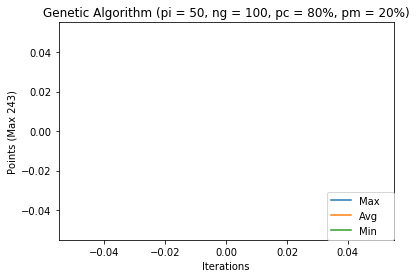

In [49]:
plt.subplot(111)
plt.plot(gensMax, label="Max")
plt.plot(gensAvg, label="Avg")
plt.plot(gensMin, label="Min")
plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
plt.ylabel('Points (Max 243)')
plt.xlabel('Iterations')
plt.show()

In [156]:
data = pd.read_csv(r"C:\Users\cmebr\Desktop\110BProj1\small2.csv")

allFixedValues = []
for n in range(len(data['quizzes'])):
    fixedValue = []
    quiz = np.reshape([int(c) for c in data['quizzes'][n]], (9,9))
    for i in range(9):
        for j in range(9):
            if quiz[i][j] != 0:
                fixedValue.append([quiz[i][j], i, j])
    allFixedValues.append(np.array(fixedValue))
    
sols = []
for n in range(len(data['solutions'])):
    sols.append(np.reshape([int(c) for c in data['solutions'][n]], (1,9**2)))

    
#for n in range(100):
randFixed = []
randIndex = np.random.randint(0,1011,100)
for i in randIndex:
    randFixed.append(allFixedValues[i])
print(randIndex)

[ 586  252  231  952  101  979  719  367   49  133  738 1009  835  636
  318   39  963  409  588  614  351   67   89  314  979  574  169  396
  144  149  707  150  970  747  963  874  835  404  847  451  774  207
  481   67  450  549  856  819   23  785  818  171  461   64  527  613
  339  308  571  425  854  632  866  366  301  863  160  297  907   63
  721   91  356  979  225  794  694  828  386  738    1   29  450  447
  139  137  826  367  742   41  556  947  623  915  590  330  912  929
   37  508]


In [157]:
import time

scores = []
corr = 0

population = toolbox.population(n=100)

allMin = []
allMax = []
allAvg = []
allStd = []

for i in range(len(randFixed)):
#    fixedValues = allFixedValues[i]

    fixedValues = randFixed[i]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
    gensMin = []
    gensMax = []
    gensAvg = []
    gensStd = []

    start = time.time()

    NGEN=75
    for gen in range(NGEN):
        #print("---GEN %i ---" % gen)
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in offspring]
        # print(list(fits))

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        gensMin.append(min(fits))
        gensMax.append(max(fits))
        gensAvg.append(mean)
        gensStd.append(std)

        # print("  Min %s" % int(min(fits)))
        #print("  Max %s" % int(max(fits)))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        population = toolbox.select(offspring, k=len(population))
    topk = tools.selBest(population, k=1)
    #print(top10)
    for solution in topk:
        print("Pontos: %i/243" % int(fitnessFromDNA64(solution)[0]))
        printBoardFromDNA64(solution)
        print("Given:", np.reshape([int(c) for c in data['quizzes'][randIndex[i]]], (9,9)))
        print("Answer:", np.reshape(sols[randIndex[i]],(9,9)))
        print("")
    
    allMin.append(gensMin)
    allMax.append(gensMax)
    allAvg.append(gensAvg)
    allStd.append(gensStd)
    tot = 243*(i+1)
    corr += int(fitnessFromDNA64(solution)[0])
    scores.append(int(fitnessFromDNA64(solution)[0]))
    end = time.time()
    print("Total Time: {t:6.2f} secs. Success rate: {corr} / {tot}.".format(t=(end-start),corr = corr, tot = tot))

Pontos: 217/243
1 4 2 |6 8 7 |3 9 5 
3 6 8 |2 9 5 |4 6 7 
6 7 9 |3 5 4 |1 8 2 
------+------+------
1 2 6 |9 3 2 |4 7 5 
8 1 7 |5 8 9 |2 3 6 
5 3 4 |4 7 6 |9 8 1 
------+------+------
2 5 1 |1 4 8 |7 6 3 
4 8 3 |7 3 1 |9 5 8 
7 9 5 |8 6 2 |3 4 1 
Given: [[0 4 0 0 0 0 0 0 0]
 [3 0 0 2 0 5 0 0 0]
 [0 0 9 3 0 4 0 0 2]
 [0 2 6 0 0 0 0 7 0]
 [0 0 0 5 8 0 0 0 0]
 [5 3 0 0 0 0 0 0 0]
 [0 0 0 1 0 8 7 6 0]
 [0 0 0 7 3 0 9 0 8]
 [0 0 5 0 6 0 0 0 0]]
Answer: [[1 4 2 8 9 6 5 3 7]
 [3 7 8 2 1 5 6 4 9]
 [6 5 9 3 7 4 1 8 2]
 [8 2 6 9 4 1 3 7 5]
 [9 1 7 5 8 3 4 2 6]
 [5 3 4 6 2 7 8 9 1]
 [2 9 3 1 5 8 7 6 4]
 [4 6 1 7 3 2 9 5 8]
 [7 8 5 4 6 9 2 1 3]]

Total Time:   4.18 secs. Success rate: 217 / 243.
Pontos: 209/243
4 7 6 |3 7 6 |8 9 5 
6 8 3 |9 4 1 |6 7 2 
5 2 1 |8 9 4 |3 4 7 
------+------+------
1 6 3 |2 4 7 |5 7 8 
5 9 8 |7 6 2 |3 6 1 
7 4 7 |1 5 8 |4 2 6 
------+------+------
5 8 4 |6 1 3 |7 9 2 
3 6 2 |8 7 9 |5 1 6 
7 1 9 |4 2 5 |4 8 3 
Given: [[0 0 0 0 0 6 0 0 0]
 [0 0 3 0 0 0 0 7 2]
 [5 2 1 0 9

Pontos: 216/243
2 8 5 |9 7 6 |9 3 1 
9 3 6 |2 4 1 |5 3 7 
1 4 7 |8 6 5 |2 6 7 
------+------+------
3 7 8 |4 1 9 |6 2 5 
8 5 1 |6 2 7 |4 9 3 
5 4 2 |6 7 3 |1 8 9 
------+------+------
8 9 4 |1 5 8 |3 2 6 
7 1 3 |2 9 6 |8 4 4 
6 2 9 |3 8 4 |7 5 1 
Given: [[2 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 5 3 0]
 [0 4 0 8 6 0 2 0 7]
 [0 7 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 3]
 [5 0 2 0 7 0 0 0 0]
 [0 0 4 1 0 0 0 0 0]
 [0 0 0 2 9 6 0 4 0]
 [6 2 0 0 8 0 7 0 1]]
Answer: [[2 1 7 5 3 4 8 9 6]
 [9 8 6 7 1 2 5 3 4]
 [3 4 5 8 6 9 2 1 7]
 [1 7 3 9 4 8 6 2 5]
 [4 9 8 6 2 5 1 7 3]
 [5 6 2 3 7 1 4 8 9]
 [8 3 4 1 5 7 9 6 2]
 [7 5 1 2 9 6 3 4 8]
 [6 2 9 4 8 3 7 5 1]]

Total Time:   3.86 secs. Success rate: 2769 / 3159.
Pontos: 212/243
7 2 9 |1 4 6 |3 5 8 
1 9 3 |7 8 4 |6 7 1 
8 7 5 |5 9 2 |3 9 2 
------+------+------
4 2 9 |7 1 5 |1 6 8 
5 3 8 |2 6 4 |9 4 7 
6 1 7 |8 3 9 |2 5 2 
------+------+------
3 8 9 |6 7 8 |4 1 5 
2 6 1 |4 5 3 |8 2 3 
8 5 4 |9 2 1 |9 6 7 
Given: [[0 0 0 0 0 0 0 5 8]
 [0 0 0 7 0 0 0 0 0]
 [8 0 0 0

Pontos: 211/243
2 5 1 |1 3 8 |6 7 9 
9 6 7 |3 7 4 |2 8 1 
3 8 4 |2 5 6 |1 4 3 
------+------+------
6 9 3 |2 8 9 |7 3 4 
2 4 1 |9 1 7 |8 6 5 
8 5 3 |5 4 3 |1 2 6 
------+------+------
5 1 6 |3 2 8 |5 9 4 
1 2 9 |7 4 1 |3 5 8 
4 7 8 |6 9 5 |2 7 1 
Given: [[0 0 0 0 0 0 6 0 0]
 [9 6 0 0 0 0 0 0 0]
 [0 8 4 0 5 0 1 0 0]
 [0 0 3 0 0 9 0 0 4]
 [2 0 0 0 1 7 8 0 0]
 [8 5 0 0 4 0 0 2 0]
 [5 0 6 0 2 8 0 0 0]
 [0 2 0 7 0 0 0 0 0]
 [4 0 0 0 0 5 0 7 0]]
Answer: [[1 3 2 8 7 4 6 9 5]
 [9 6 5 1 3 2 4 8 7]
 [7 8 4 9 5 6 1 3 2]
 [6 1 3 2 8 9 7 5 4]
 [2 4 9 5 1 7 8 6 3]
 [8 5 7 6 4 3 9 2 1]
 [5 7 6 4 2 8 3 1 9]
 [3 2 8 7 9 1 5 4 6]
 [4 9 1 3 6 5 2 7 8]]

Total Time:   3.95 secs. Success rate: 5306 / 6075.
Pontos: 216/243
5 7 9 |4 1 2 |8 6 3 
4 9 8 |5 6 7 |3 5 1 
3 2 6 |8 1 3 |7 6 9 
------+------+------
4 5 3 |9 5 2 |6 1 8 
6 8 7 |1 9 4 |5 2 3 
1 2 5 |3 8 6 |9 4 7 
------+------+------
2 3 8 |6 4 1 |2 9 6 
7 4 1 |2 5 9 |8 7 5 
6 9 5 |7 3 8 |1 3 4 
Given: [[5 0 0 0 0 0 0 6 0]
 [4 0 8 5 0 7 0 0 0]
 [0 2 6 0

Pontos: 212/243
2 9 3 |5 6 8 |7 1 4 
7 8 6 |4 1 3 |5 3 2 
3 4 1 |8 6 2 |2 5 7 
------+------+------
1 7 6 |4 2 9 |2 7 3 
4 9 8 |6 3 5 |1 4 3 
5 3 2 |1 7 8 |8 6 9 
------+------+------
8 7 4 |1 5 7 |6 2 5 
3 1 9 |2 9 6 |7 4 8 
6 2 5 |3 8 4 |7 9 1 
Given: [[2 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 5 3 0]
 [0 4 0 8 6 0 2 0 7]
 [0 7 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 3]
 [5 0 2 0 7 0 0 0 0]
 [0 0 4 1 0 0 0 0 0]
 [0 0 0 2 9 6 0 4 0]
 [6 2 0 0 8 0 7 0 1]]
Answer: [[2 1 7 5 3 4 8 9 6]
 [9 8 6 7 1 2 5 3 4]
 [3 4 5 8 6 9 2 1 7]
 [1 7 3 9 4 8 6 2 5]
 [4 9 8 6 2 5 1 7 3]
 [5 6 2 3 7 1 4 8 9]
 [8 3 4 1 5 7 9 6 2]
 [7 5 1 2 9 6 3 4 8]
 [6 2 9 4 8 3 7 5 1]]

Total Time:   3.90 secs. Success rate: 7843 / 8991.
Pontos: 214/243
5 8 9 |1 5 6 |2 4 7 
3 1 7 |8 6 9 |4 1 3 
2 4 6 |3 1 2 |9 5 6 
------+------+------
6 9 1 |5 8 2 |7 3 4 
8 2 7 |9 4 3 |5 6 1 
9 5 3 |7 1 4 |2 6 8 
------+------+------
1 9 8 |4 5 7 |2 3 6 
7 6 2 |8 9 2 |1 8 5 
4 7 5 |6 3 1 |4 9 2 
Given: [[5 8 0 0 0 0 2 0 0]
 [3 0 0 0 6 0 0 0 0]
 [0 4 6 0

Pontos: 207/243
9 1 6 |5 8 6 |2 4 3 
7 3 2 |8 2 5 |6 8 1 
3 5 4 |4 7 1 |7 9 2 
------+------+------
1 7 9 |6 5 4 |8 3 8 
2 4 7 |3 1 9 |3 6 5 
6 8 3 |7 1 2 |8 4 7 
------+------+------
8 4 5 |8 6 3 |1 2 9 
4 9 7 |2 3 1 |5 3 6 
1 6 8 |9 5 7 |2 7 4 
Given: [[0 0 0 5 0 0 0 0 3]
 [0 0 0 8 2 0 0 0 1]
 [3 0 0 0 0 1 7 9 0]
 [1 7 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [6 0 0 7 1 2 0 4 0]
 [0 4 0 0 6 0 0 0 0]
 [0 9 0 0 0 0 0 0 0]
 [0 6 0 0 5 0 2 0 0]]
Answer: [[4 1 6 5 7 9 8 2 3]
 [9 5 7 8 2 3 4 6 1]
 [3 8 2 6 4 1 7 9 5]
 [1 7 4 3 9 5 6 8 2]
 [5 2 9 4 8 6 3 1 7]
 [6 3 8 7 1 2 5 4 9]
 [2 4 3 1 6 7 9 5 8]
 [8 9 5 2 3 4 1 7 6]
 [7 6 1 9 5 8 2 3 4]]

Total Time:   3.74 secs. Success rate: 10384 / 11907.
Pontos: 215/243
4 3 5 |9 6 1 |7 8 1 
9 7 1 |6 3 8 |2 5 4 
6 2 8 |2 1 4 |7 3 9 
------+------+------
2 4 9 |6 5 2 |8 1 7 
8 5 2 |1 7 4 |3 6 9 
1 6 3 |9 8 3 |5 7 2 
------+------+------
8 1 7 |8 9 7 |6 4 3 
2 9 4 |7 2 6 |9 1 5 
3 5 6 |1 4 9 |8 2 6 
Given: [[0 0 5 9 0 1 0 8 0]
 [0 7 0 6 0 0 0 0 4]
 [6 0 0

Pontos: 210/243
1 6 9 |7 2 3 |5 8 4 
7 4 8 |2 3 8 |3 1 9 
3 4 2 |5 1 6 |9 7 2 
------+------+------
4 2 9 |1 5 7 |1 3 6 
2 8 3 |6 8 4 |2 9 7 
6 5 1 |3 9 2 |5 8 4 
------+------+------
1 2 6 |8 7 5 |6 5 4 
3 4 5 |9 2 1 |7 6 8 
9 7 8 |7 4 6 |3 2 5 
Given: [[0 0 0 0 0 0 0 0 4]
 [0 0 8 0 3 0 0 1 9]
 [3 4 2 0 1 6 0 0 0]
 [0 0 9 0 0 0 0 0 6]
 [0 8 0 0 0 4 0 0 0]
 [6 5 0 0 0 2 0 8 0]
 [1 0 0 0 0 0 0 5 0]
 [0 0 5 0 2 1 0 0 8]
 [0 0 0 0 4 0 3 0 0]]
Answer: [[9 7 1 2 5 8 6 3 4]
 [5 6 8 4 3 7 2 1 9]
 [3 4 2 9 1 6 8 7 5]
 [2 1 9 8 7 3 5 4 6]
 [7 8 3 5 6 4 1 9 2]
 [6 5 4 1 9 2 7 8 3]
 [1 2 6 3 8 9 4 5 7]
 [4 3 5 7 2 1 9 6 8]
 [8 9 7 6 4 5 3 2 1]]

Total Time:   3.92 secs. Success rate: 12909 / 14823.
Pontos: 213/243
9 4 1 |6 8 5 |7 3 2 
3 5 8 |4 7 6 |4 8 1 
2 6 4 |3 5 9 |1 5 9 
------+------+------
4 3 6 |2 9 5 |8 7 3 
8 5 2 |7 1 4 |6 1 9 
1 7 9 |2 3 8 |5 4 2 
------+------+------
9 1 5 |8 7 3 |7 4 6 
7 2 3 |8 4 1 |9 6 5 
6 8 7 |9 2 5 |3 9 4 
Given: [[9 0 1 0 0 5 0 3 0]
 [0 0 0 4 0 6 0 8 1]
 [0 6 0

Pontos: 215/243
3 2 5 |6 8 9 |6 1 4 
6 9 7 |8 2 1 |8 5 3 
4 1 8 |5 7 6 |9 2 4 
------+------+------
5 8 6 |2 7 1 |3 9 5 
9 4 3 |7 4 5 |2 1 6 
2 3 1 |3 6 8 |4 7 8 
------+------+------
8 5 2 |7 3 4 |1 4 9 
1 4 7 |8 9 3 |2 6 7 
7 6 9 |4 1 2 |5 3 1 
Given: [[0 0 5 0 0 9 0 1 0]
 [0 9 7 0 2 0 0 0 0]
 [0 1 0 0 0 6 0 0 4]
 [5 0 0 0 0 0 0 0 0]
 [0 0 0 7 4 0 0 0 6]
 [0 3 0 0 0 8 0 7 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 8 0 3 2 0 0]
 [0 6 0 4 0 0 0 3 1]]
Answer: [[6 4 5 3 8 9 7 1 2]
 [8 9 7 1 2 4 6 5 3]
 [2 1 3 5 7 6 9 8 4]
 [5 7 6 9 3 1 4 2 8]
 [1 2 8 7 4 5 3 9 6]
 [9 3 4 2 6 8 1 7 5]
 [3 8 2 6 1 7 5 4 9]
 [4 5 1 8 9 3 2 6 7]
 [7 6 9 4 5 2 8 3 1]]

Total Time:   4.07 secs. Success rate: 15456 / 17739.
Pontos: 213/243
3 2 7 |5 6 4 |6 9 8 
9 6 1 |8 7 3 |4 7 5 
7 8 4 |9 5 2 |1 9 3 
------+------+------
6 7 3 |1 3 9 |9 8 4 
2 9 4 |6 1 7 |8 5 3 
8 5 1 |2 4 1 |7 2 6 
------+------+------
5 4 6 |3 2 8 |3 1 7 
3 2 8 |7 9 4 |5 6 4 
4 1 9 |6 1 5 |2 7 9 
Given: [[0 0 0 0 0 0 6 0 0]
 [9 6 0 0 0 0 0 0 0]
 [0 8 4

Pontos: 216/243
2 6 9 |4 8 1 |7 3 6 
8 5 1 |2 7 6 |2 4 9 
3 7 6 |3 9 4 |8 5 1 
------+------+------
9 8 4 |9 3 6 |5 2 7 
5 3 7 |1 2 7 |1 8 4 
1 2 7 |6 4 8 |9 6 3 
------+------+------
4 6 2 |7 5 9 |3 1 5 
7 8 5 |2 4 1 |2 9 6 
1 5 3 |8 6 3 |4 7 8 
Given: [[0 0 0 0 0 1 0 3 0]
 [0 0 0 0 7 0 0 0 9]
 [3 0 0 0 0 0 8 0 1]
 [9 0 0 0 0 0 0 0 7]
 [0 0 7 0 0 0 1 8 0]
 [0 2 0 6 4 0 0 0 0]
 [0 0 2 0 0 0 0 0 5]
 [0 0 0 2 0 0 0 9 0]
 [1 5 3 0 6 0 0 7 0]]
Answer: [[5 8 9 4 2 1 7 3 6]
 [2 1 6 8 7 3 5 4 9]
 [3 7 4 5 9 6 8 2 1]
 [9 3 5 1 8 2 4 6 7]
 [6 4 7 3 5 9 1 8 2]
 [8 2 1 6 4 7 9 5 3]
 [4 9 2 7 3 8 6 1 5]
 [7 6 8 2 1 5 3 9 4]
 [1 5 3 9 6 4 2 7 8]]

Total Time:   3.75 secs. Success rate: 18003 / 20655.
Pontos: 206/243
2 8 9 |1 4 8 |7 5 8 
3 5 1 |5 9 7 |4 6 2 
7 6 1 |2 3 2 |9 3 5 
------+------+------
8 4 9 |3 6 5 |5 2 1 
5 3 8 |6 7 4 |1 2 9 
2 1 7 |8 1 9 |6 4 8 
------+------+------
3 4 2 |4 2 1 |8 9 6 
1 7 9 |8 5 6 |5 1 3 
2 6 5 |7 3 9 |4 8 7 
Given: [[0 0 0 0 4 0 0 0 0]
 [3 0 0 0 0 0 0 6 2]
 [0 0 1

Pontos: 214/243
9 4 5 |1 3 9 |7 1 6 
5 2 3 |8 6 1 |9 5 6 
7 6 1 |9 7 5 |2 3 4 
------+------+------
2 9 7 |6 5 7 |8 4 1 
1 2 4 |3 8 6 |3 7 9 
8 5 9 |2 4 1 |5 6 2 
------+------+------
6 1 4 |5 2 8 |6 9 7 
3 3 2 |7 9 4 |1 8 5 
8 7 6 |5 1 3 |4 2 8 
Given: [[0 0 0 0 0 9 0 0 0]
 [0 0 0 8 0 0 9 0 6]
 [0 6 1 0 0 0 0 3 0]
 [0 0 0 0 0 7 0 0 0]
 [0 0 4 0 0 0 3 7 0]
 [0 0 9 0 4 1 5 0 2]
 [0 0 0 0 2 0 0 0 7]
 [3 0 0 0 0 0 1 0 5]
 [8 0 0 5 1 0 4 2 0]]
Answer: [[2 8 3 1 6 9 7 5 4]
 [4 7 5 8 3 2 9 1 6]
 [9 6 1 7 5 4 2 3 8]
 [5 2 8 3 9 7 6 4 1]
 [6 1 4 2 8 5 3 7 9]
 [7 3 9 6 4 1 5 8 2]
 [1 5 6 4 2 3 8 9 7]
 [3 4 2 9 7 8 1 6 5]
 [8 9 7 5 1 6 4 2 3]]

Total Time:   3.87 secs. Success rate: 20546 / 23571.
Pontos: 212/243
8 6 5 |1 2 7 |4 8 9 
1 2 3 |6 9 3 |5 4 7 
4 7 5 |7 5 8 |2 3 6 
------+------+------
6 2 9 |7 3 4 |7 5 1 
7 5 2 |8 3 1 |3 6 9 
3 7 4 |2 6 5 |6 8 2 
------+------+------
2 3 1 |5 4 7 |9 6 5 
5 8 6 |9 1 2 |1 2 4 
9 4 2 |3 8 6 |8 7 3 
Given: [[0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 3 0 4 0]
 [0 0 5

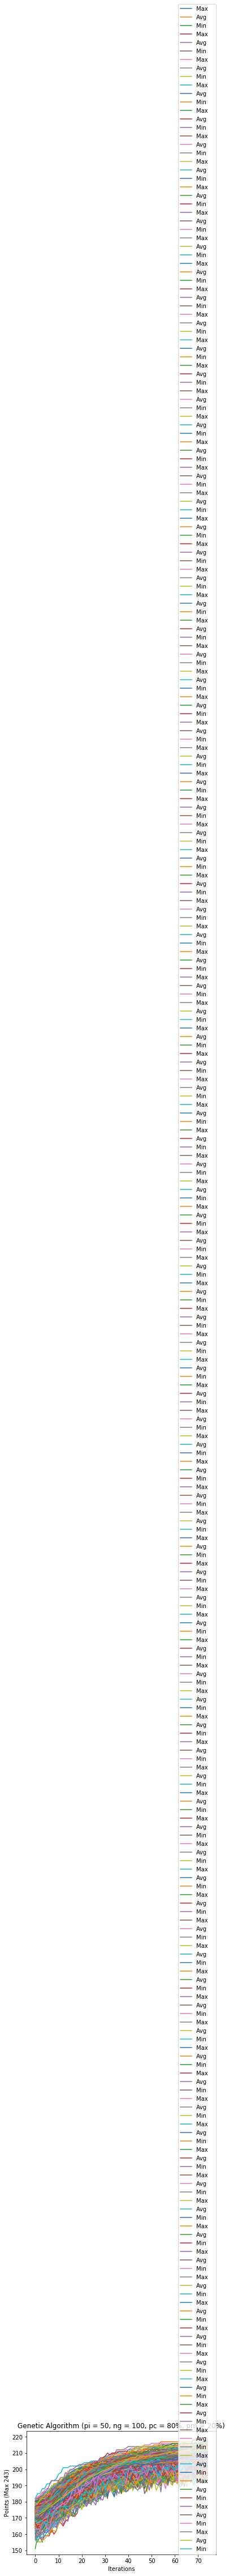

In [158]:
plt.subplot(111)
for i in range(len(randFixed)):
    plt.plot(allMax[i], label="Max")
    plt.plot(allAvg[i], label="Avg")
    plt.plot(allMin[i], label="Min")
    plt.legend(bbox_to_anchor=(0.8, 0.0, 0.2, .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
    plt.title('Genetic Algorithm (pi = 50, ng = 100, pc = 80%, pm = 20%)')
    plt.ylabel('Points (Max 243)')
    plt.xlabel('Iterations')
plt.show()

In [159]:
print(solution)
print(sols[randIndex[-1]])

[7, 6, 5, 9, 8, 7, 4, 4, 9, 1, 3, 6, 5, 1, 7, 3, 6, 7, 9, 3, 1, 8, 9, 3, 4, 7, 5, 9, 8, 5, 6, 6, 8, 9, 3, 7, 2, 7, 5, 5, 8, 7, 4, 6, 7, 2, 1, 2, 1, 4, 3, 5, 3, 7, 2, 1, 5, 4, 7, 8, 5, 4, 6, 9]
[[6 9 1 7 3 5 8 4 2 7 4 5 9 2 8 3 1 6 8 2 3 4 1 6 5 7 9 2 5 4 6 8 1 9 3 7
  1 6 7 5 9 3 2 8 4 9 3 8 2 7 4 6 5 1 4 8 9 3 6 7 1 2 5 5 1 2 8 4 9 7 6 3
  3 7 6 1 5 2 4 9 8]]


# Trying to use accuracy over uniqueness

In [118]:
def printBoard(board):
    for i in range(len(board)):
        if(i % 3 == 0 and i != 0):
            print("------+------+------")
        for j in range(len(board[i])):
            if(j % 3 == 0 and j != 0):
                sys.stdout.write("|")
            sys.stdout.write(str(board[i][j]) + " ")
        print("")

def printBoardFromDNA64(individual):
    board = buildBoardFromDNA64(individual)
    printBoard(board)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("pos_val", random.randint, 1, 9)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.pos_val, n=64)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def fitnessFromDNA64(individual, solution):
    board = buildBoardFromDNA64(individual)
    return fitnessFromBoard(board, solution),

def buildBoardFromDNA64(individual):
    flattenedIdx = list(map(lambda t: t[1]*9 + t[2], fixedValues))
    values = fixedValues.T[0]
    flatBoard = []
    fixedValuesCounter = 0
    for i in range(81):
        if(i in flattenedIdx):
            flatBoard.append(values[fixedValuesCounter])
            fixedValuesCounter += 1
            continue
        flatBoard.append(individual[i - fixedValuesCounter])
    return np.array(flatBoard).reshape(9,9)


#def fitnessFromBoard(board, solution):
#    score = 0
#    rows, cols = board.shape
#    for row in board:
#        print(row)
#        score += len(np.unique(row))
#    for col in board.T:
#        score += len(np.unique(col))
#    for i in range(0, 3):
#        for j in range(0, 3):
#            sub = board[3*i:3*i+3, 3*j:3*j+3]
#            score += len(np.unique(sub))
#    return score

def fitnessFromBoard(board, solution):
    solution = np.reshape(solution, (9,9))
    score = 0
    rows, cols = board.shape
    for i in range(rows):
        score += np.sum(board[i]==solution[i])
        for j in range(cols):
            score += np.sum(board[i][j]==solution[i][j])
    for i in range(0, 3):
        for j in range(0, 3):
            sub1 = board[3*i:3*i+3, 3*j:3*j+3]
            sub2 = solution[3*i:3*i+3, 3*j:3*j+3]
            score += np.sum(sub1 != sub2)
    return score
    
toolbox.register("evaluate", fitnessFromDNA64)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=9, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selBest, k = 300)

C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\cmebr\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [128]:
import time

scores = []
corr = 0

population = toolbox.population(n=100)

allMin = []
allMax = []
allAvg = []
allStd = []

for i in range(len(randFixed)):
#    fixedValues = allFixedValues[i]
    solution = sols[i]
    fixedValues = randFixed[i]

# stats = tools.Statistics(lambda ind: ind.fitness.values)
# stats.register("avg", np.mean)
# stats.register("std", np.std)
# stats.register("min", np.min)
# stats.register("max", np.max)
    gensMin = []
    gensMax = []
    gensAvg = []
    gensStd = []

    start = time.time()

    NGEN=100
    for gen in range(NGEN):
        #print("---GEN %i ---" % gen)
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring, solution)
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values for ind in offspring]
        fits = fits[0]
        # print(list(fits))

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        gensMin.append(min(fits))
        gensMax.append(max(fits))
        gensAvg.append(mean)
        gensStd.append(std)

        # print("  Min %s" % int(min(fits)))
        #print("  Max %s" % int(max(fits)))
        # print("  Avg %s" % mean)
        # print("  Std %s" % std)
        population = toolbox.select(offspring, k=len(population))
    topk = tools.selBest(population, k=1)
    #print(top10)
    for sol in topk:
        print("Points: %i/243" % int(fitnessFromDNA64(sol, solution)[0]))
        printBoardFromDNA64(sol)
        print(np.reshape(sols[i],(9,9)))
        print("")
    
    allMin.append(gensMin)
    allMax.append(gensMax)
    allAvg.append(gensAvg)
    allStd.append(gensStd)
    tot = 243*(i+1)
    corr += int(fitnessFromDNA64(sol, solution)[0])
    scores.append(int(fitnessFromDNA64(sol, solution)[0]))
    end = time.time()
    print("Total Time: {t:6.2f} secs. Success rate: {corr} / {tot}.".format(t=(end-start),corr = corr, tot = tot))

TypeError: unhashable type: 'Individual'